# Smoke Detection Analysis
Detect smoke with the help of IOT data and trigger a fire alarm.

In [3]:

# Dataset with hidden feature column names and target classes.
#We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.
# import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

Process:-
1. Data exploration
2. EDA
3. Data cleaning
4. Build Model
5. Train model
6. Cross validate
7. Test model

In [4]:
#read data
df=pd.read_csv('smoke_detection_iot.csv')
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB
None
         Unnamed: 0       

TVOC, eCO2,PM1.0,PM2.5,NC0.5,NC1.0,NC2.6 have an unusual max value

In [6]:
df.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [7]:
# Removing unwanted features
df.drop(columns=['Unnamed: 0','UTC','CNT'],axis=1,inplace=True)

In [8]:
#checking null values
df.isna().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

In [12]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Fire Alarm',axis=1))
df_scaled = pd.DataFrame(scaled_features,columns=df.columns[:-1])

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,0.280622,0.994947,-0.248614,-0.141679,-2.335935,-2.025006,0.831761,-0.109043,-0.09334,-0.115215,-0.091924,-0.073889
1,0.281666,0.917115,-0.248614,-0.141679,-2.192796,-1.810079,0.838521,-0.109043,-0.09334,-0.115215,-0.091924,-0.073889
2,0.282641,0.837028,-0.248614,-0.141679,-2.086359,-1.624683,0.834014,-0.109043,-0.09334,-0.115215,-0.091924,-0.073889
3,0.283686,0.760324,-0.248614,-0.141679,-2.027636,-1.485227,0.832512,-0.109043,-0.09334,-0.115215,-0.091924,-0.073889
4,0.284730,0.693773,-0.248614,-0.141679,-1.979923,-1.367099,0.838521,-0.109043,-0.09334,-0.115215,-0.091924,-0.073889


In [13]:
#Train_test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_scaled,df['Fire Alarm'],test_size=0.3,random_state=42)


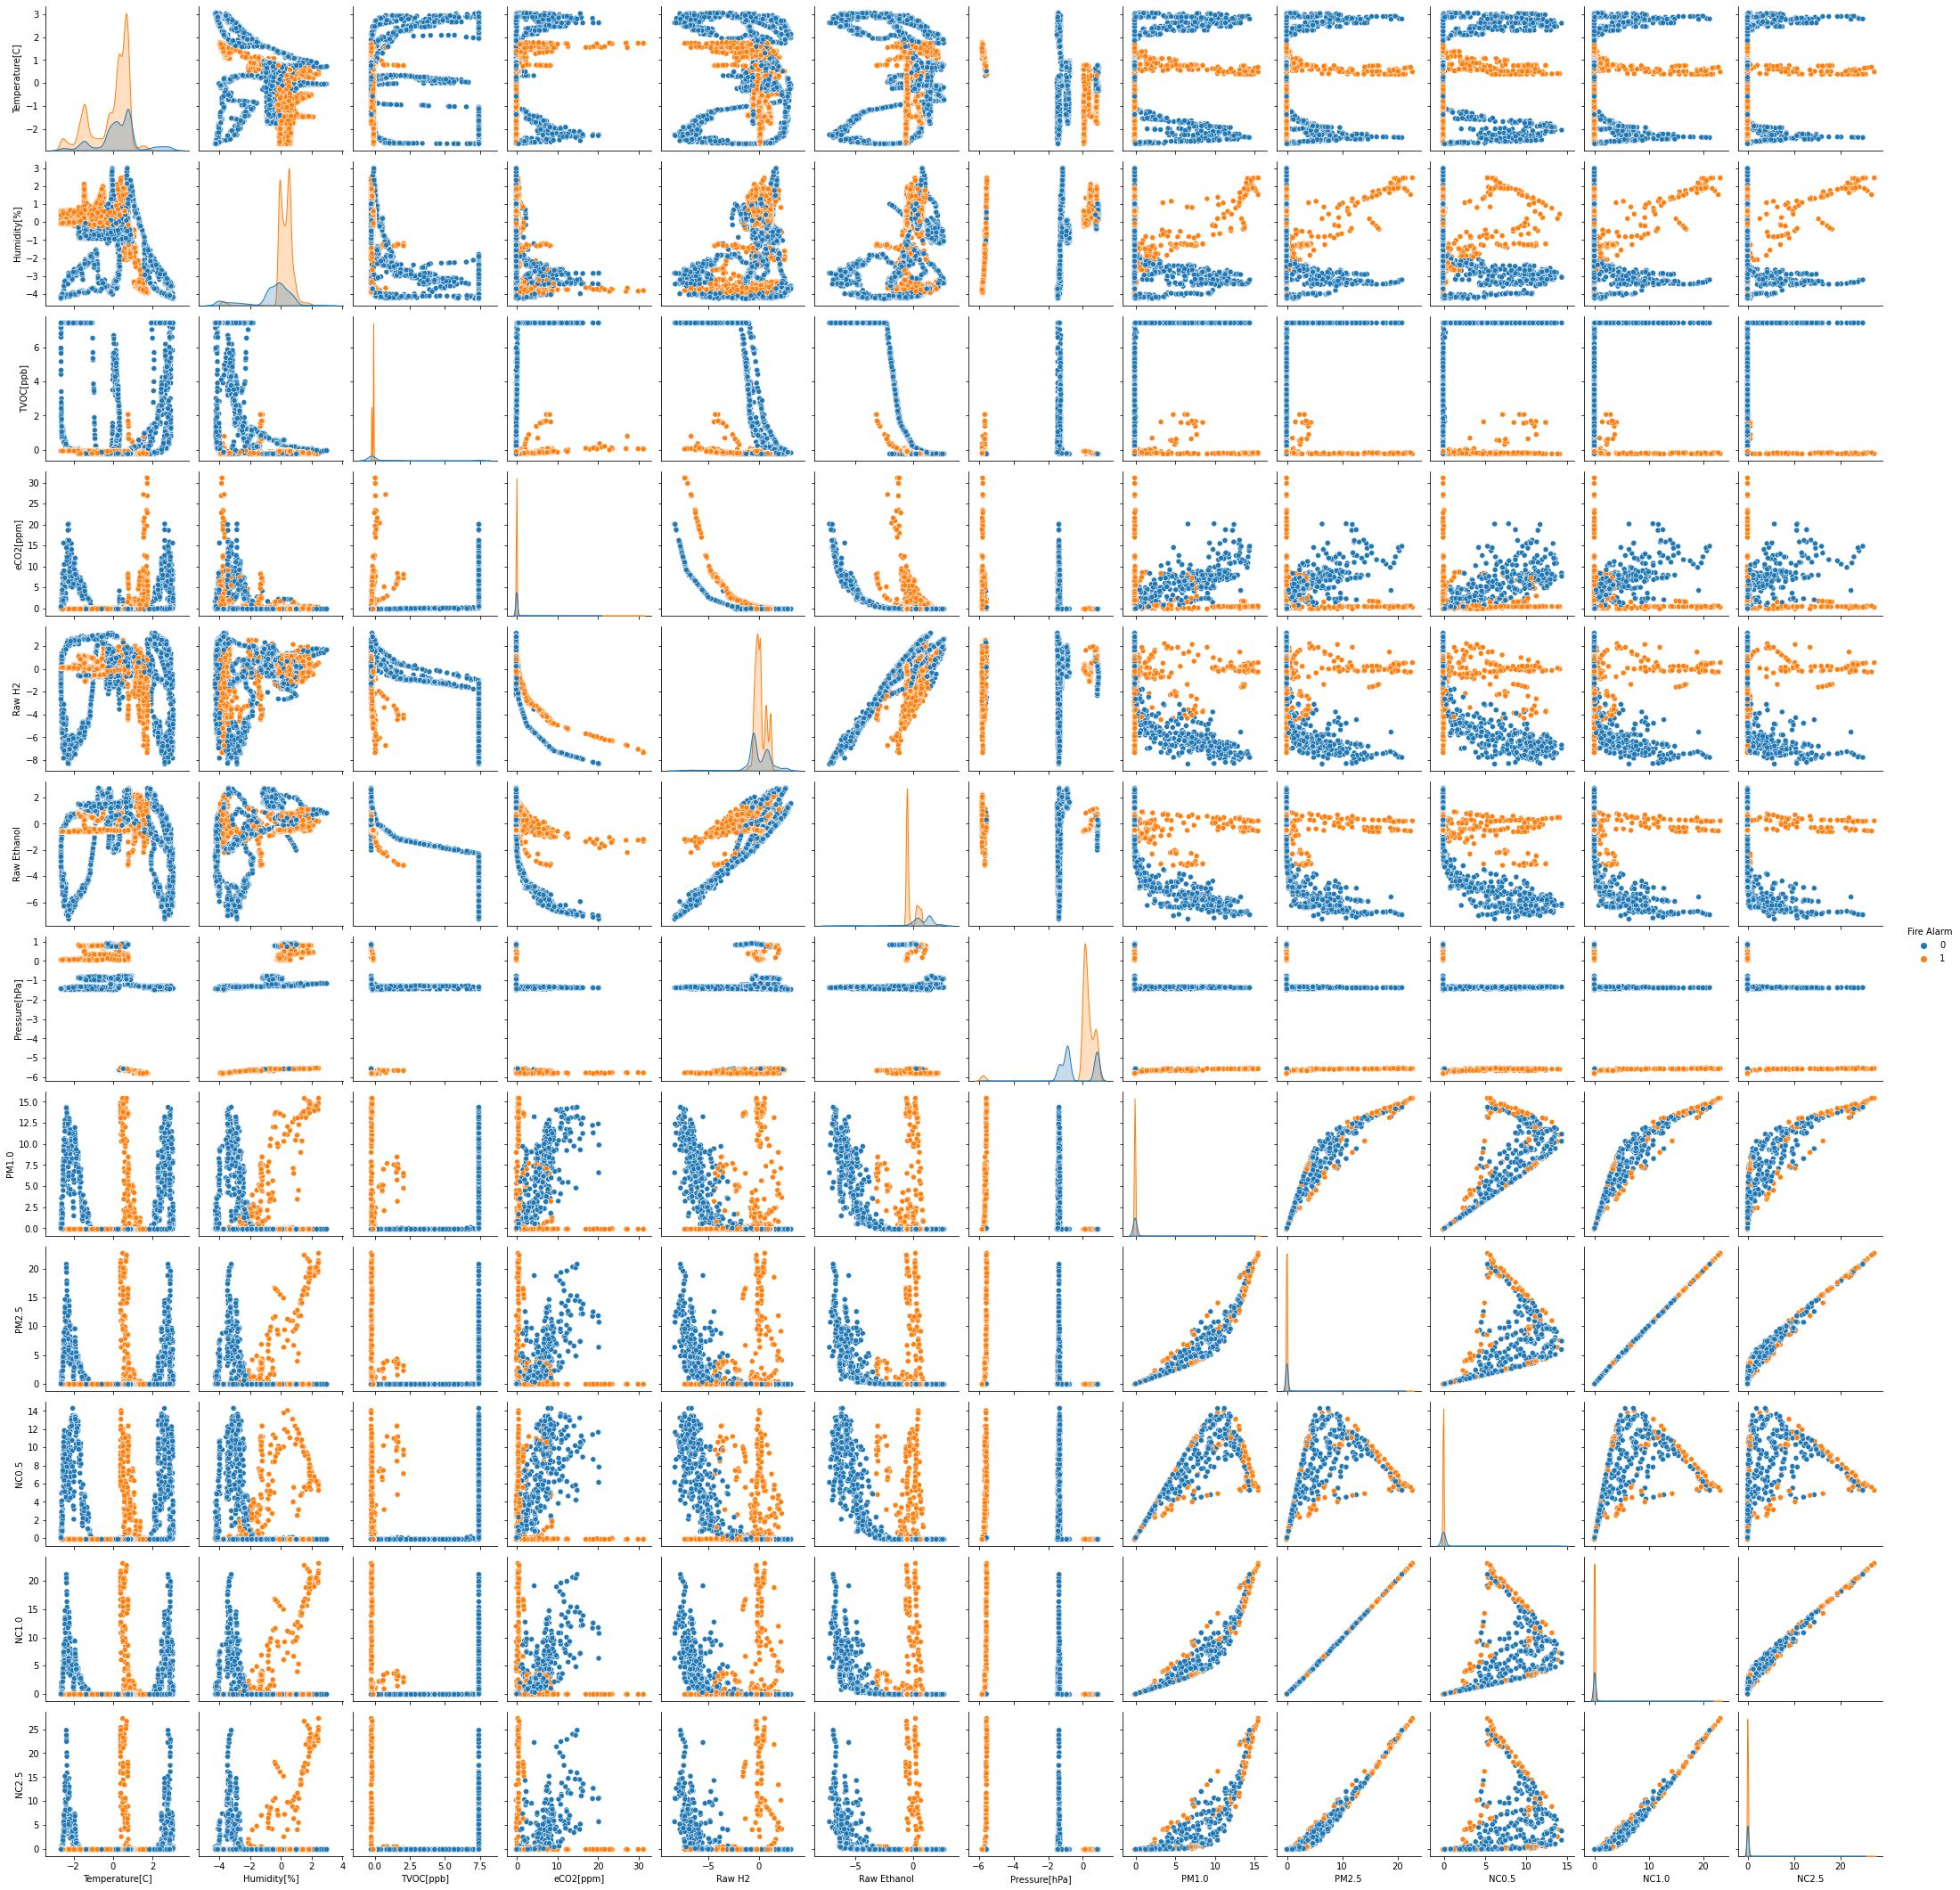

In [18]:
sb.pairplot(X_train.join(y_train),hue='Fire Alarm')

In [23]:
# Using KNN classifier starting with n=1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
y_predict = knn.predict(X_test)

array([1, 1, 0, ..., 1, 1, 1])

In [26]:
# Evaluating the KNN Model
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       1.00      1.00      1.00     13354

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



In [29]:
# Finding the accurate K value
error_arr =[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    i_predict = knn.predict(X_test)
    error_arr.append(np.mean(i_predict != y_test))
    

Text(0, 0.5, 'Error rate')

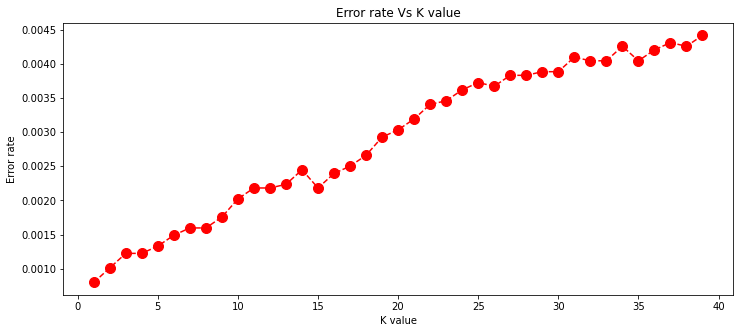

In [31]:
plt.figure(figsize=(12,5))
plt.plot(range(1,40),error_arr,color='red',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate Vs K value')
plt.xlabel('K value')
plt.ylabel('Error rate')

In [38]:
print(confusion_matrix(y_predict,y_test))

[[ 5423     3]
 [   12 13351]]


Error rate increases as K value increases, we can clearly see that the error rate is minimum at k=1

In [36]:
#Let's check for K=60
knn = KNeighborsClassifier(n_neighbors=60)
knn.fit(X_train,y_train)
y_pred_2 =knn.predict(X_test)

In [37]:
print(classification_report(y_pred_2,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5404
           1       1.00      1.00      1.00     13385

    accuracy                           1.00     18789
   macro avg       0.99      0.99      0.99     18789
weighted avg       1.00      1.00      1.00     18789



K=60 still gives accurate results

In [39]:
print(confusion_matrix(y_pred_2,y_test))

[[ 5373    31]
 [   62 13323]]
